In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

## Загрузка данных и первичный осмотр

Загрузим данные и начнем изучать наш датасет:

In [ ]:
df = pd.read_csv('kicksharing (1).csv')
df

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,E,1.555069,2024-09-25 11:39:42.000000,2024-09-25 11:39:46.885000,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,NaN
396745,348829245,1146263947,M,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.0,300.0,Max,2.270902,2024-09-24 20:05:43.000000,2024-09-24 20:05:46.954000,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,NaN
396746,273529251,1012601147,M,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.0,300.0,E,1.411171,2024-09-03 16:07:43.000000,2024-09-03 16:07:45.311487,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,NaN
396747,306062051,863877659,M,19,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,1.002400,2024-09-12 18:28:48.000000,2024-09-12 18:28:50.401000,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

Теперь посмотрим на основные значения для числовых признаков

In [ ]:
df.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,3.536155,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,1.209075,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,3.000000,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,3.000000,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,3.000000,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,12.000000,5627.640000,3185.000000,55429.360970


## Заполнение пропусков

Теперь посмотрим как обстоит ситуация с пропущенными значениями в нашем датасете

In [ ]:
df.isnull().sum()

,0
order_rk,0
party_rk,0
gender_cd,2921
age,0
education_level_cd,206690
marital_status_cd,179020
lvn_state_nm,34177
minute_cost,0
activation_cost,0
hold_amount,0


Как мы видим у нас есть порядка 3000 пропусков пола, это чуть меньше 1% от всех данных поэтому эти пропуски можно заполнить значеним Unknown.

Очень много пропусков уровня образования и семейного статуса, чтобы учитывать хотя бы имеющуюся половину данных будем также заполнять пропущенные ячейки значением Unknown.

Примерно 10% записей не имеют информацию о районе проживания пользователя, данная категория крайне важна для нас и тут у нас 2 варианта: либо создание Unknown_Region по аналогии с предыдущими пропусками либо же предиктивное заполнение по связи с часовым поясом.

Что касается пропусков информации о кешбеке то:

* Очевидно по пропускам, что большинство пользуется дебетовой картой, а не кредитной
* Для определния реального количества пропусков данной информации необходимо посмотреть кол-во строк в которых пропущены оба эти значения

In [ ]:
(df['loyalty_accrual_rub_amt'].isnull() & df['loyalty_accrual_bns_amt'].isnull()).sum()

np.int64(7813)

Как мы видим почти 8000 значений у нас отсутствует, в таком случае имеет смысл указать там значение 0.

In [ ]:
df['loyalty_accrual_rub_amt'].fillna(0, inplace=True)
df['loyalty_accrual_bns_amt'].fillna(0, inplace=True)

/tmp/ipython-input-7-3189249984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loyalty_accrual_rub_amt'].fillna(0, inplace=True)
/tmp/ipython-input-7-3189249984.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Что касается пропусков в регионах пользователей, то самым логичным решением в данном случае будет заполнение пропусков наиболее частым значением региона по часовому поясу.

*То есть если самый распространенный регион по часовому поясу +3 - Москва, то пропущенные значения, где такой же часовой пояс будут заполняться этим регионом*

In [ ]:
df_with_regions = df.dropna(subset=['lvn_state_nm'])
#берем первую моду если вдруг их будет несколько
tz_to_region = df_with_regions.groupby('book_time_zone_cd')['lvn_state_nm'].agg(lambda x: x.mode()[0]).to_dict()

missing_regions = df[df['lvn_state_nm'].isnull()].index
df.loc[missing_regions, 'lvn_state_nm'] = df.loc[missing_regions, 'book_time_zone_cd'].map(tz_to_region)

Также заполним остальные метрики значениями "Неизвестно"

In [ ]:
df['gender_cd'].fillna('Unknown', inplace=True)
df['education_level_cd'].fillna('Unknown', inplace=True)
df['marital_status_cd'].fillna('Unknown', inplace=True)

/tmp/ipython-input-9-4116548420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender_cd'].fillna('Unknown', inplace=True)
/tmp/ipython-input-9-4116548420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

---

## Фичр инжинеринг и графики

In [ ]:
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])
df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])
df['book_start_date'] = df['local_book_start_dttm'].dt.date
df['book_start_hour'] = df['local_book_start_dttm'].dt.hour
df['travel_time'] = df['book_end_dttm'] - df['book_start_dttm']
df['travel_time'] = np.round(df['travel_time'].dt.total_seconds(), 2)

df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])
ru_holidays_2024 = holidays.RU(years=2024)
df['is_holiday_or_weekend'] = df['local_book_start_dttm'].dt.date.apply(lambda date: date in ru_holidays_2024 or date.weekday() >= 5)

df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,book_start_date,book_start_hour,travel_time,is_holiday_or_weekend
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0,2024-08-07,11,1230.01,False
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0,2024-10-17,14,414.83,False
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0,2024-09-19,7,410.69,False
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0,2024-10-04,16,138.56,False
4,258647149,238473615,M,34,Unknown,Unknown,Г МОСКВА,6.99,50.0,300.0,...,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0,2024-07-10,6,605.43,False


---
### Распределение полов
Можно рассмотреть распределение пользователей по полу, чтобы выявить дисбаланс в аудитории. Это важно для сегментации клиентов, персонализации предложений и анализа поведения в зависимости от гендерной принадлежности.

/tmp/ipython-input-11-2022082330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender_cd', palette='pastel')


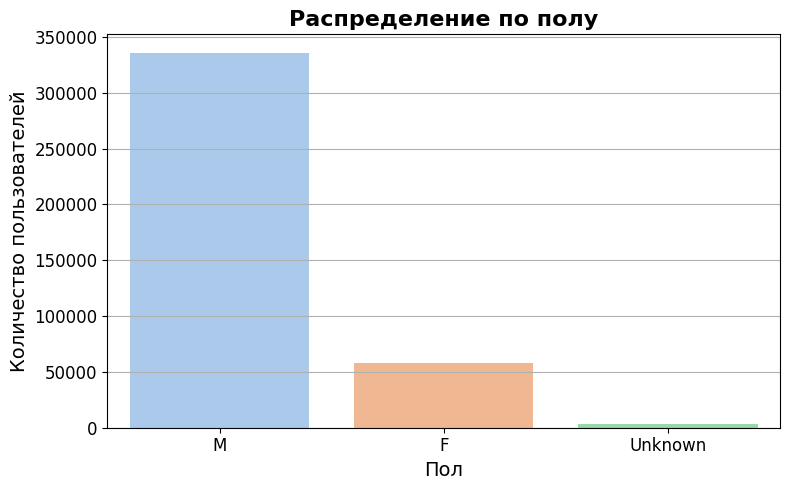

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender_cd', palette='pastel')

plt.title('Распределение по полу', fontsize=16, fontweight='bold')
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Большинство пользователей - мужчины, их значительно больше, чем женщин. Женщины составляют заметно меньшую долю, а доля пользователей с неуказанным полом минимальна. Это может повлиять на интерпретацию поведения и требует учета при построении моделей или аналитических выводов.

---
### Распределение длительности поездок (в минутах)
Можем рассмотреть распределение длительности поездок, чтобы понять, как часто совершаются короткие и длинные поездки. Это позволяет выявить основные паттерны использования самокатов и определить, есть ли значительное число аномально длинных или, наоборот, слишком коротких поездок.

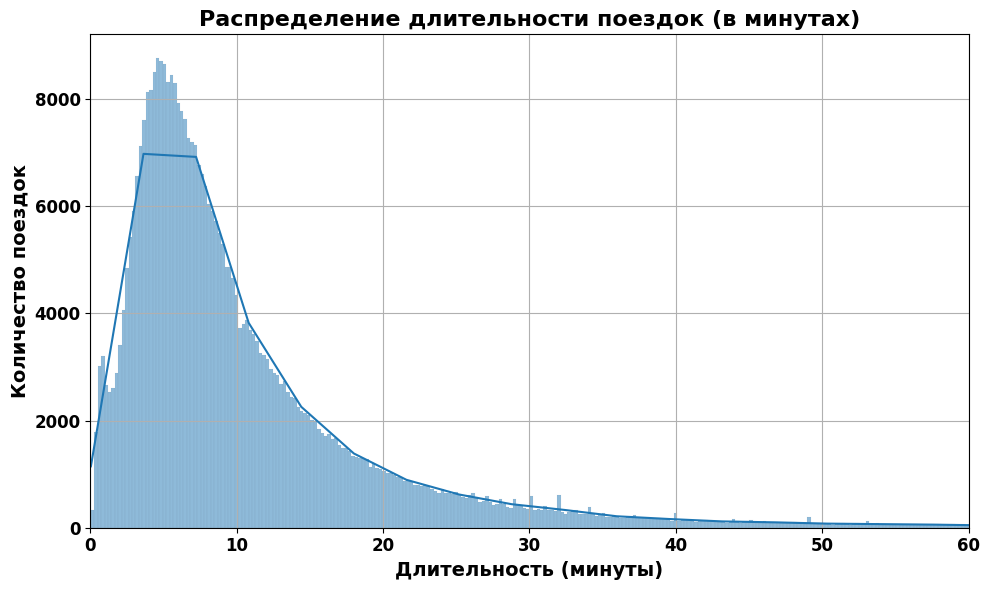

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['travel_time'] / 60, kde=True)
plt.title('Распределение длительности поездок (в минутах)', fontsize=16, fontweight='bold')
plt.xlabel('Длительность (минуты)', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xlim((0, 60))
plt.grid(True)
plt.tight_layout()
plt.show()

Можно заметить, что большинство поездок занимает от 5 до 10 минут. Это говорит о том, что самокаты чаще всего используют для коротких передвижений — например, добраться до метро или магазина. Длинные поездки встречаются редко, скорее всего, это прогулки или нестандартные случаи.

---
### Распределение поездок времени суток
Имеет смысл посмотреть на распределение поездок по времени суток, чтобы понять, в какие часы сервис наиболее востребован. Это поможет выявить пики нагрузки — например, утренние и вечерние часы — и оценить, насколько активно самокаты используются в течение дня.

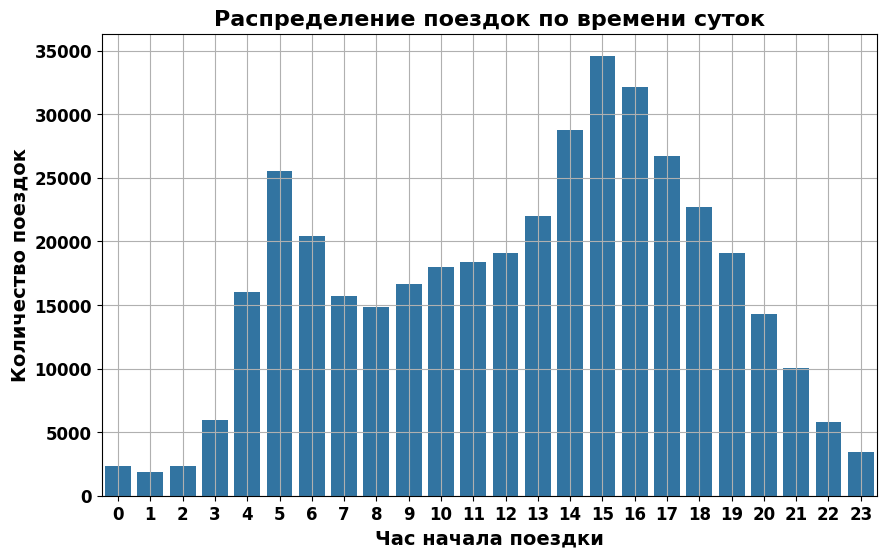

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='book_start_hour', data=df)
plt.title('Распределение поездок по времени суток', fontsize=16, fontweight='bold')
plt.xlabel('Час начала поездки', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

На графике видно, что самокаты чаще всего используют утром и днём. Утренний пик может быть связан с поездками на работу, а дневной и вечерний — с прогулками или досугом. В целом, самокаты популярны в течение всего дня, особенно в светлое время суток.

---
### Корреляция числовых признаков
Можно построить тепловую карту корреляций между числовыми параметрами, чтобы выявить, какие из них взаимосвязаны. Например, очевидная связь между расстоянием и временем — ожидаема, но также можно заметить слабые или неожиданные корреляции, которые могут натолкнуть на гипотезы.

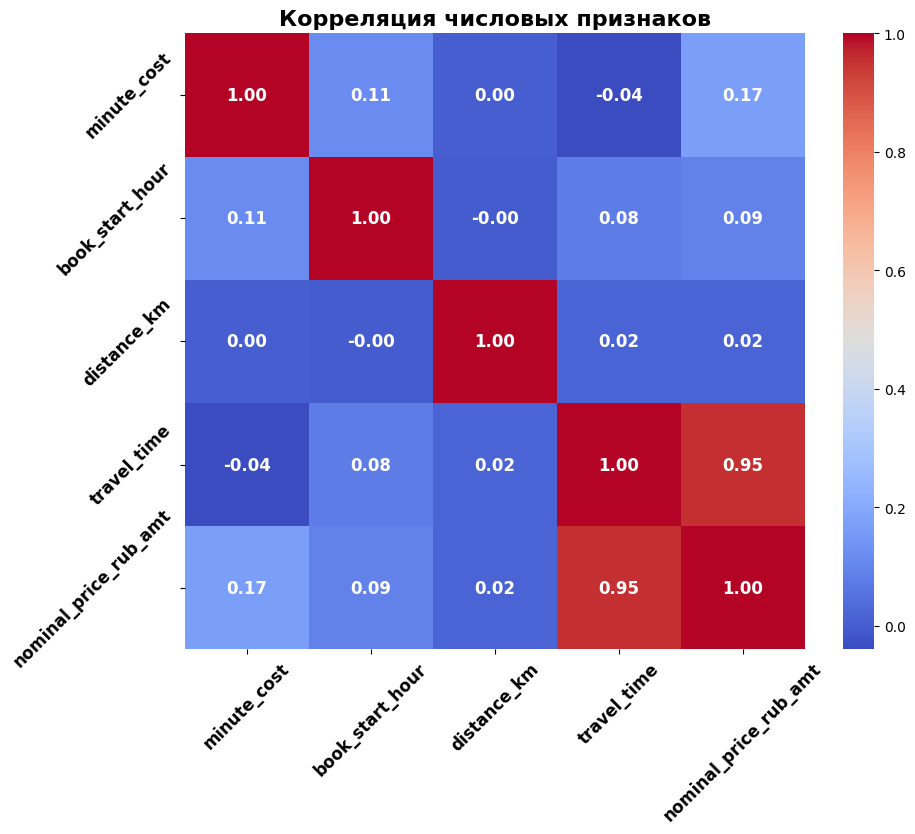

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[['minute_cost', 'book_start_hour', 'distance_km', 'travel_time', 'nominal_price_rub_amt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Корреляция числовых признаков', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Самая сильная связь — между временем поездки и её стоимостью. Это логично: чем дольше едешь, тем больше платишь. Остальные признаки почти не связаны между собой — например, время суток или километраж почти не влияют на цену.

---
### Распределение времени поездок по типам дня
Можем сравнить среднюю длительность поездок в рабочие и выходные дни, чтобы понять, меняется ли поведение пользователей. Например, в выходные поездки могут быть дольше из-за прогулочного характера, а в будни — короче и более утилитарные.

/tmp/ipython-input-15-435715222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='is_holiday_or_weekend', y=df['travel_time'] / 60, palette = ['red', 'green'])
/tmp/ipython-input-15-435715222.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Рабочий день', 'Выходной день'], fontsize=11, fontweight='bold')


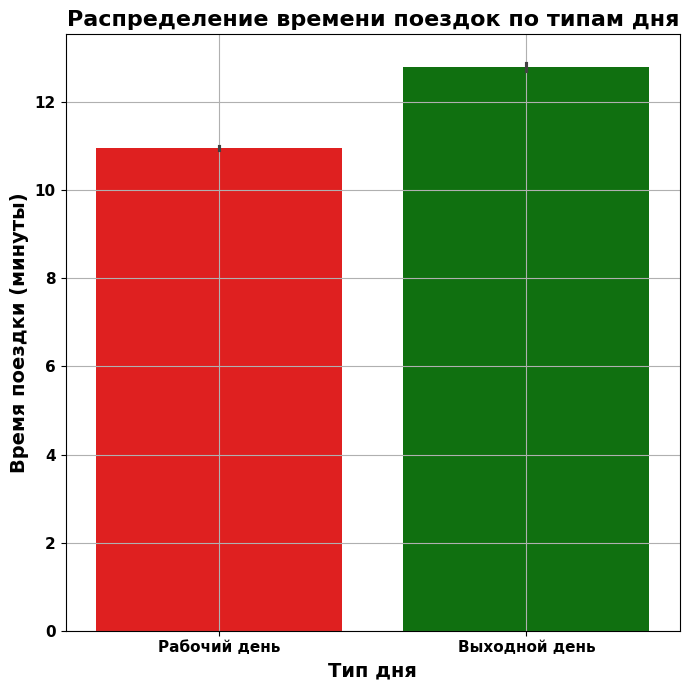

In [ ]:
plt.figure(figsize=(7, 7))
ax = sns.barplot(data=df, x='is_holiday_or_weekend', y=df['travel_time'] / 60, palette = ['red', 'green'])
plt.title('Распределение времени поездок по типам дня', fontsize=16, fontweight='bold')
plt.xlabel('Тип дня', fontsize=14, fontweight='bold')
plt.ylabel('Время поездки (минуты)', fontsize=14, fontweight='bold')
ax.set_xticklabels(['Рабочий день', 'Выходной день'], fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

В выходные поездки в среднем немного длиннее, чем в будни. Видимо, в будние дни самокаты используют по делу, а в выходные — чтобы просто покататься или прогуляться. Разница не очень большая, но заметна.

---

## Создание сводной таблицы

Необходимо создать сводную таблицу по каждому пользователю и добавить несколько новых мерик туда. Это необходимо для дальнейшей кластеризации пользователей и прогноза оттока клиентов.

In [ ]:
customer_df = df.groupby('party_rk').agg(
    age=('age', 'first'),
    gender=('gender_cd', 'first'),
    region=('lvn_state_nm', 'first'),

    total_trips=('order_rk', 'count'),
    total_spent_rub=('nominal_price_rub_amt', 'sum'),
    total_distance_km=('distance_km', 'sum'),
    total_duration_sec=('travel_time', 'sum'),

    avg_trip_cost=('nominal_price_rub_amt', 'mean'),
    avg_trip_distance=('distance_km', 'mean'),
    avg_trip_duration=('travel_time', 'mean'),

    total_cashback_rub=('loyalty_accrual_rub_amt', 'sum'),

    first_trip_date=('local_book_start_dttm', 'min'),
    last_trip_date=('local_book_start_dttm', 'max')
)

print(customer_df.shape)
customer_df.head()

(64052, 13)


,age,gender,region,total_trips,total_spent_rub,total_distance_km,total_duration_sec,avg_trip_cost,avg_trip_distance,avg_trip_duration,total_cashback_rub,first_trip_date,last_trip_date
party_rk,,,,,,,,,,,,,
14717,43,M,ЛЕНИНГРАДСКАЯ ОБЛ,1,604.26,3.263743,4421.96,604.260000,3.263743,4421.9600,211.28,2024-07-20 15:03:20.255749,2024-07-20 15:03:20.255749
15725,40,M,Г МОСКВА,4,513.17,6.908815,2396.21,128.292500,1.727204,599.0525,157.50,2024-08-29 10:33:03.269223,2024-09-24 08:59:00.814000
22290,53,M,Г МОСКВА,6,1239.64,24.961698,6873.03,206.606667,4.160283,1145.5050,297.83,2024-07-14 11:48:58.994207,2024-09-07 09:26:07.612000
22530,38,M,СТАВРОПОЛЬСКИЙ КРАЙ,4,588.91,10.248125,3433.04,147.227500,2.562031,858.2600,74.90,2024-05-20 18:07:17.817487,2024-07-12 15:22:51.781995
27063,53,M,ОБЛ ЧЕЛЯБИНСКАЯ,1,153.80,1.652186,685.31,153.800000,1.652186,685.3100,153.80,2024-09-09 11:32:12.984000,2024-09-09 11:32:12.984000


Итого имеется 64000 клиента, теперь добавим несколько метрик в эту таблицу и уже после этого перейдем к кластеризации наших клиентов

In [ ]:
# Сначала добавим соотношение поездок в праздничные/выходные дни ко всем поездкам
weekend_counts = df[df['is_holiday_or_weekend']].groupby('party_rk')['order_rk'].count()
customer_df['weekend_trip_ratio'] = weekend_counts / customer_df['total_trips']
customer_df['weekend_trip_ratio'].fillna(0, inplace=True)

# Теперь добавим среднюю стоимость за километр и за минуту
customer_df['avg_cost_per_km'] = customer_df['total_spent_rub'] / customer_df['total_distance_km']
customer_df['avg_cost_per_min'] = customer_df['total_spent_rub'] / (customer_df['total_duration_sec'] / 60)

# Избавляемся от возможных пропусков и бесконечностей в данных
customer_df.replace([np.inf, -np.inf], 0, inplace=True)
customer_df.fillna(0, inplace=True)

/tmp/ipython-input-17-3968127190.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_df['weekend_trip_ratio'].fillna(0, inplace=True)


In [ ]:
customer_df

,age,gender,region,total_trips,total_spent_rub,total_distance_km,total_duration_sec,avg_trip_cost,avg_trip_distance,avg_trip_duration,total_cashback_rub,first_trip_date,last_trip_date,weekend_trip_ratio,avg_cost_per_km,avg_cost_per_min
party_rk,,,,,,,,,,,,,,,,
14717,43,M,ЛЕНИНГРАДСКАЯ ОБЛ,1,604.26,3.263743,4421.96,604.260000,3.263743,4421.960000,211.28,2024-07-20 15:03:20.255749,2024-07-20 15:03:20.255749,1.000000,185.143248,8.198989
15725,40,M,Г МОСКВА,4,513.17,6.908815,2396.21,128.292500,1.727204,599.052500,157.50,2024-08-29 10:33:03.269223,2024-09-24 08:59:00.814000,0.000000,74.277573,12.849542
22290,53,M,Г МОСКВА,6,1239.64,24.961698,6873.03,206.606667,4.160283,1145.505000,297.83,2024-07-14 11:48:58.994207,2024-09-07 09:26:07.612000,1.000000,49.661685,10.821777
22530,38,M,СТАВРОПОЛЬСКИЙ КРАЙ,4,588.91,10.248125,3433.04,147.227500,2.562031,858.260000,74.90,2024-05-20 18:07:17.817487,2024-07-12 15:22:51.781995,0.000000,57.465145,10.292510
27063,53,M,ОБЛ ЧЕЛЯБИНСКАЯ,1,153.80,1.652186,685.31,153.800000,1.652186,685.310000,153.80,2024-09-09 11:32:12.984000,2024-09-09 11:32:12.984000,0.000000,93.088795,13.465439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300448310,23,M,Г МОСКВА,1,209.80,2.852660,1150.63,209.800000,2.852660,1150.630000,62.94,2024-10-08 16:31:22.888000,2024-10-08 16:31:22.888000,0.000000,73.545392,10.940094
1300455702,21,M,Г САНКТ-ПЕТЕРБУРГ,2,195.88,0.889155,646.14,97.940000,0.444578,323.070000,64.46,2024-10-15 20:05:47.546000,2024-10-15 20:14:16.352000,0.000000,220.298933,18.189247
1300625360,33,M,Г МОСКВА,1,140.70,0.952323,556.52,140.700000,0.952323,556.520000,49.25,2024-10-19 12:29:48.526000,2024-10-19 12:29:48.526000,1.000000,147.743951,15.169266


Также создадим переменные отображающие кол-во дней с последней поездки до последней даты в нашем датасете, кол-во дней "жизни" каждого клиента и количество поездок за каждую неделю.

In [ ]:
snapshot_date = customer_df['last_trip_date'].max() + pd.Timedelta(days=1)
customer_df['days_since_last_trip'] = (snapshot_date - customer_df['last_trip_date']).dt.days
customer_df['customer_lifetime_days'] = (customer_df['last_trip_date'] - customer_df['first_trip_date']).dt.days
customer_df['trips_per_week'] = customer_df['total_trips'] / (customer_df['customer_lifetime_days'].replace(0, 1) / 7)

## Первой нашей ML задачей будет кластеризация пользователей

Для начала нормализуем данные

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
features_for_clustering = [
    'days_since_last_trip',
    'trips_per_week',
    'total_spent_rub',
    'avg_trip_duration',
    'weekend_trip_ratio',
    'age'
]

X_for_clustering = customer_df[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_clustering)

Теперь найдем оптимальное количество кластеров

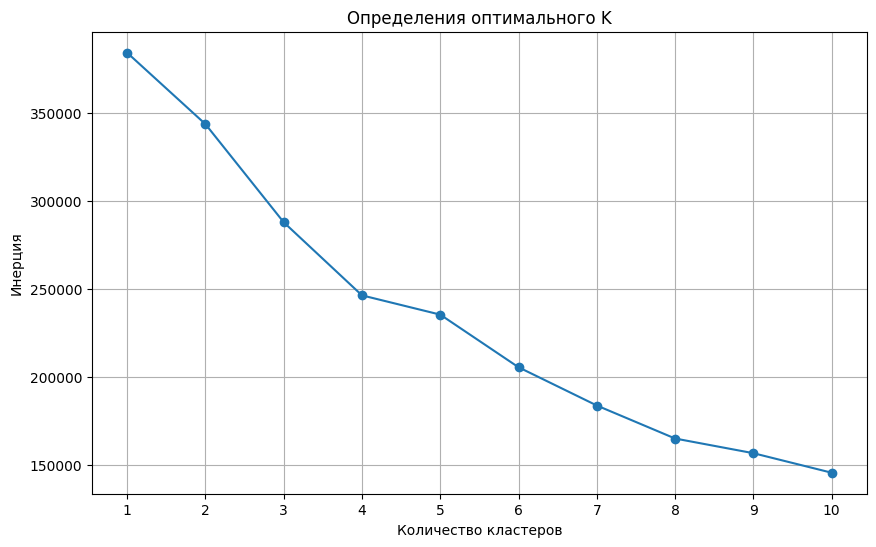

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Определения оптимального K')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Как мы видим по графику после k = 4 у нас идет менее резкий спад инерции, попробуем взять количество кластеров равных от 3 до 5.

Также дополнительно будем использовать метод силуэта для оценки кластеризации.

In [ ]:
k_candidates = [3, 4, 5]

for k in k_candidates:
  print(f"==========================================================")
  print(f"| АНАЛИЗ РЕЗУЛЬТАТОВ ДЛЯ K = {k}                           |")
  print(f"==========================================================")

  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  labels = kmeans.fit_predict(X_scaled)

  customer_df['temp_cluster'] = labels
  cluster_analysis_df = customer_df.groupby('temp_cluster')[features_for_clustering].mean()

  cluster_analysis_df['cluster_size'] = customer_df['temp_cluster'].value_counts()

  cluster_analysis_df_sorted = cluster_analysis_df.sort_values(by='total_spent_rub', ascending=False)

  print(cluster_analysis_df_sorted)
  print("\n")

customer_df.drop(columns=['temp_cluster'], inplace=True)

| АНАЛИЗ РЕЗУЛЬТАТОВ ДЛЯ K = 3                           |
              days_since_last_trip  trips_per_week  total_spent_rub  \
temp_cluster                                                          
0                        13.981791        4.761046      6796.372872   
1                        52.529409        5.328991       585.103750   
2                        64.876181        8.451337       374.744448   

              avg_trip_duration  weekend_trip_ratio        age  cluster_size  
temp_cluster                                                                  
0                    690.514179            0.242630  31.626328          2636  
1                    858.532773            0.118523  31.708788         46176  
2                   1271.875103            0.915316  32.989895         15240  


| АНАЛИЗ РЕЗУЛЬТАТОВ ДЛЯ K = 4                           |
              days_since_last_trip  trips_per_week  total_spent_rub  \
temp_cluster                                              



---



## Анализ получившихся кластеров и выводы по первой бизнес-задаче

### Анализ кластеров и их количества

Проанализировав результаты при 3-х кластерах можно интерпритировать их следующим образом:

Кластер 0: "VIP / Супер-лояльные" (2636 чел).
Портрет: Самые ценные клиенты (total_spent_rub ~6800). Активны (последняя поездка всего 14 дней назад). Ездят довольно часто.

Кластер 1: "Массовый сегмент, склонный к оттоку" (46176 чел).
Портрет: Огромная группа. Тратят мало (total_spent_rub ~585). Не очень активны (days_since_last_trip ~53 дня). Почти не катаются в выходные (weekend_trip_ratio ~0.12).

Кластер 2: "Лояльные пользователи выходного дня" (15240 чел).
Портрет: Очень четкий сегмент. Тратят мало. Почти ВСЕ их поездки в выходные (weekend_trip_ratio ~0.92!). Но при этом они довольно "старые" клиенты (days_since_last_trip ~65 дней).




---



Анализ для 4-х кластеров показал уже более осмысленное распределение:

Кластер 3: "VIP / Супер-лояльные" (1674 чел).
Портрет: Это ядро нашего лучшего кластера из K=3. Они тратят еще больше (~8421), очень активны.


Кластер 2: "Пользователи выходного дня" (13829 чел).
Портрет: Почти не изменился. Это все те же люди, кто катается исключительно в выходные. Очень стабильная группа.
Что произошло с огромным Кластером 1 из K=3? Он разделился на два!


Кластер 0 (K=4): "Стабильные середнячки" (27230 чел). Тратят немного (~900), довольно активны (days_since_last_trip ~30 дней).


Кластер 1 (K=4): "Комьютеры в оттоке" (21319 чел). Тратят очень мало (~350). Критически неактивны (days_since_last_trip ~81 день!). И они абсолютно не катаются в выходные (weekend_trip_ratio ~0.05). Это пользователь, который использовал самокат для поездок на работу, а потом перестал.



---



Далее анализ для 5-ти кластеров:

Кластеры 2 и 4 (K=5): Это наши "Пользователи выходного дня" и "Комьютеры в оттоке". Они почти не изменились.

Какие изменения наблюдаются?

Разделился кластер "VIP / Супер-лояльные" и "Стабильные середнячки" из K=4.


Кластер 3 (K=5): "Элита / VIP" (523 чел). Очень маленькая, но сверхценная группа. Тратят огромные деньги (~13341), исключительно активны (10 дней с последней поездки).


Кластер 0 (K=5): "Просто лояльные" (4196 чел). Тратят много (3938), очень активны (18 дней).


Кластер 1 (K=5): "Стабильные середнячки / Основная масса" (26303 чел). Все тот же наш массовый, но активный сегмент.

### Выводы по первой задаче и рекомендации

Сегмент 1: "Элита / VIP" (около 500 человек)
Стратегия: Удержание и эксклюзивность. Этих клиентов нельзя "купить" простой скидкой. Им нужен статус и особое отношение.
Конкретные тактики:
Программа "Премиум": Предложить им бесплатное улучшение подписки на следующий год с эксклюзивными бонусами (увеличенное время ожидания, персональный менеджер, ранний доступ к новым моделям самокатов).


Сегмент 2: "Лояльные" (около 4200 человек)
Стратегия: Рост и геймификация. Наша цель — удержать их и мотивировать стать "Элитой".
Конкретные тактики:
Ввести подписку: Предложить им более выгодную подписку (например, "250 руб/месяц за безлимитные старты"), которая сделает частые поездки еще выгоднее.
Система достижений: Ввести в приложении "ачивки" и статусы ("Эксперт", "Магистр поездок") за количество поездок или километров. Также можно предлагать им купить пакеты минут со скидкой, чтобы стимулировать более длинные поездки.


Сегмент 3: "Стабильные середнячки" (около 26 000 человек)
Стратегия: Вовлечение и Upsell. Наша цель — увеличить их средний чек и частоту поездок.
Конкретные тактики:
Целевые акции: Предлагать им скидки на поездки в выходные, чтобы стимулировать прогулочный паттерн, push-уведомления("Отличная погода для прогулки на самокате!), кросс-промо: интеграция с другими сервисами Т-Города(Купи билет в кино через наше приложение и получи скидку на самокат, чтобы доехать до кинотеатра)


Сегмент 4: "Пользователи выходного дня" (около 14 000 человек)
Стратегия: Усиление ниши. Не пытаться заставить их ездить на работу, а стать для них лучшим сервисом для отдыха.
Конкретные тактики:
Тематические маршруты: Создать в приложении "Маршрут по паркам" или "Тур по набережной" и предлагать его этому сегменту в пятницу вечером.
Партнерства: Договориться о скидках с кафе и ресторанами по пути следования популярных маршрутов. "Завершите поездку у 'Кофемании' и получите скидку 15% на кофе".


Сегмент 5: "Пользователи маршрутов до работы (в оттоке)" (около 19 000 человек)
Стратегия: Реактивация (осторожная). Попытаться вернуть их одним мощным предложением, не тратя много денег.
Конкретные тактики:
Email-кампания "Мы скучаем!": Отправить им письмо с очень щедрым предложением.
Также можно использовать A/B тестирование: Разделить сегмент на две части. Одной предложить скидку, другой — пакет бесплатных минут. Посмотреть, что сработает лучше. Но также важно не спамить, так как это может вызвать негатив по отношению к бренду (при игнорировании 1-2 предложений отпустить их)

## Задача бинарной классификации

Создаем целевую переменную и порог дней после которых считаем клиента окончательно ушедшим.

In [ ]:
CHURN_THRESHOLD_DAYS = 60

In [ ]:
customer_df['is_churned'] = (customer_df['days_since_last_trip'] > CHURN_THRESHOLD_DAYS).astype(int)
customer_df['is_churned'].value_counts(normalize=True)

,proportion
is_churned,
0,0.63105
1,0.36895


Определяем целевую переменную и исходные признаки которые будем использовать.

Также с помощью кодируем значения гендера и региона

In [ ]:
y = customer_df['is_churned']

X = customer_df.drop(columns=[
    'is_churned',
    'days_since_last_trip',
    'last_trip_date',
    'first_trip_date',
    'customer_lifetime_days'
])

X = pd.get_dummies(X, columns=['gender', 'region'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

Разделяем данные на обучающую и тестовую выборки с учетом дисбаланса классов

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (51241, 226)
X_test: (12811, 226)


In [ ]:
from sklearn.preprocessing import StandardScaler

Масштабируем

In [ ]:
# Находим числовые колонки (все, кроме тех, что начинаются с 'gender_' или 'region_')
numerical_cols = [col for col in X_train.columns if not col.startswith(('gender_', 'region_'))]

scaler = StandardScaler()

# Обучаем scaler ТОЛЬКО на обучающих данных
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Применяем тот же самый обученный scaler к тестовым данным
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nЧисловые признаки успешно масштабированы.")


Числовые признаки успешно масштабированы.


## Обучение моделей

In [ ]:
!pip install catboost

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import optuna
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

results_tuned = {}
roc_curves = {}

# нужно настроить кросс-валидацию для Optuna:
# cv=3 - хороший баланс скорости и надежности
# StratifiedKFold - чтобы сохранять баланс классов в фолдах
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)



---



### Логистическая регрессия

#### Дефолтная лог регрессия

In [ ]:
# в параметре class_weight установим balanced чтоб не было дисбаланса классов
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]


results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1 Score': f1_score(y_test, y_pred_log_reg),
    'ROC AUC': roc_auc_score(y_test, y_proba_log_reg)
}

roc_curves['Logistic Regression'] = roc_curve(y_test, y_proba_log_reg)
results['Logistic Regression']

{'Accuracy': 0.7505268909530872,
 'Precision': 0.6298998812150008,
 'Recall': 0.7852760736196319,
 'F1 Score': 0.6990583804143126,
 'ROC AUC': np.float64(0.8230437032692587)}

#### Подбор гиперпараметров лог регрессии

Для подбора гиперпараметров будем использовать библиотеку optuna

In [ ]:
def objective_lr(trial):
    params = {
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'C': trial.suggest_loguniform('C', 0.01, 100),
    }
    # выбираем solver в зависимости от штрафа
    if params['penalty'] == 'l1':
        params['solver'] = 'liblinear'
    else:
        params['solver'] = 'lbfgs' # lbfgs быстрее для l2

    model = LogisticRegression(**params, random_state=42, class_weight='balanced', max_iter=1000)
    score = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='f1', n_jobs=-1).mean()
    return score

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=20) # 20 попыток

# обучаем лучшую модель и сохраненяем результат
best_params_lr = study_lr.best_params
if best_params_lr['penalty'] == 'l1': best_params_lr['solver'] = 'liblinear'
else: best_params_lr['solver'] = 'lbfgs'

best_lr = LogisticRegression(**best_params_lr, random_state=42, class_weight='balanced', max_iter=1000)
best_lr.fit(X_train, y_train)


y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:, 1]
results_tuned['Logistic Regression (Optuna)'] = {
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}
roc_curves['Logistic Regression (Optuna)'] = roc_curve(y_test, y_proba)
print(f"Лучший F1 на CV: {study_lr.best_value:.4f}. F1 на тесте: {results_tuned['Logistic Regression (Optuna)']['F1 Score']:.4f}\n")

[I 2025-06-25 15:34:00,354] A new study created in memory with name: no-name-c663ff8c-8eb5-40b5-94eb-1f2eeb17e931
/tmp/ipython-input-112-160825946.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2025-06-25 15:34:04,057] Trial 0 finished with value: 0.6981397840525637 and parameters: {'penalty': 'l2', 'C': 0.020694618389550775}. Best is trial 0 with value: 0.6981397840525637.
/tmp/ipython-input-112-160825946.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2025-06-25 15:34:06,507] Trial 1 finished with value: 0.702588832774038 and parameters: {'penalty': 'l2', 'C': 

Лучший F1 на CV: 0.7044. F1 на тесте: 0.6980





---



#### Выводы по улучшению лог регрессии

Удалось не удалось улучшить результаты этим подбором гиперпараметров, поэтому в финальном сравнении будет использованна обычная версия логистической регрессии.



---



### Метод опорных векторов



---



Так как метод svc не масштабирует и обучение на наших объемах данных могло бы занять значительное количество времени (при самом худщем раскладе более 30 минут) и чтобы не переходить к линейной версии данного алгоритма будем использовать в качестве обучения 10% нашей выборки.

#### Default SVC

In [ ]:
from sklearn.model_selection import train_test_split

X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, train_size=0.1, random_state=42, stratify=y_train
)

print(f"Размер полной обучающей выборки: {X_train.shape[0]}")
print(f"Размер подвыборки для SVC: {X_train_sample.shape[0]}")

print("--- 2. Метод опорных векторов (SVC) на подвыборке ---")
# Обучаем SVC на этой маленькой выборке
svc = SVC(random_state=42, class_weight='balanced', probability=True)
svc.fit(X_train_sample, y_train_sample)

# Предсказание делаем на ПОЛНОЙ тестовой выборке
y_pred_svc = svc.predict(X_test)
y_proba_svc = svc.predict_proba(X_test)[:, 1]

# Сохраняем метрики
results['SVC'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svc),
    'Precision': precision_score(y_test, y_pred_svc),
    'Recall': recall_score(y_test, y_pred_svc),
    'F1 Score': f1_score(y_test, y_pred_svc),
    'ROC AUC': roc_auc_score(y_test, y_proba_svc)
}

roc_curves['SVC'] = roc_curve(y_test, y_proba_svc)

results['SVC']

Размер полной обучающей выборки: 51241
Размер подвыборки для SVC: 5124
--- 2. Метод опорных векторов (SVC) на подвыборке ---


{'Accuracy': 0.75388338146905,
 'Precision': 0.633843537414966,
 'Recall': 0.7884493336154009,
 'F1 Score': 0.7027434712925427,
 'ROC AUC': np.float64(0.8273383597464616)}

#### Подбор гиперпараметров SVC

In [ ]:
def objective_svc(trial):
    params = {
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'C': trial.suggest_loguniform('C', 0.1, 100),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
    }
    model = SVC(**params, random_state=42, class_weight='balanced', probability=True)
    # обучаем на урезанной выборке
    score = cross_val_score(model, X_train_sample, y_train_sample, cv=cv_strategy, scoring='f1', n_jobs=-1).mean()
    return score


study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(objective_svc, n_trials=30)

# обучение лучшей модели + сохранение резов
best_svc = SVC(**study_svc.best_params, random_state=42, class_weight='balanced', probability=True)
best_svc.fit(X_train_sample, y_train_sample)


y_pred = best_svc.predict(X_test)
y_proba = best_svc.predict_proba(X_test)[:, 1]
results_tuned['SVC (Optuna)'] = {
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}
roc_curves['SVC (Optuna)'] = roc_curve(y_test, y_proba)
print(f"Лучший F1 на CV: {study_svc.best_value:.4f}. F1 на тесте: {results_tuned['SVC (Optuna)']['F1 Score']:.4f}\n")

[I 2025-06-25 15:38:58,904] A new study created in memory with name: no-name-e013cfdc-77be-4bdd-b4e5-1109ee888505
/tmp/ipython-input-114-1723759305.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 100),
[I 2025-06-25 15:39:46,119] Trial 0 finished with value: 0.6947897861752418 and parameters: {'kernel': 'linear', 'C': 14.690667842549587, 'gamma': 'auto'}. Best is trial 0 with value: 0.6947897861752418.
/tmp/ipython-input-114-1723759305.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 100),
[I 2025-06-25 15:40:09,481] Trial 1 finished with value: 0.6953422139107968 and parameters: {'ke

Лучший F1 на CV: 0.7068. F1 на тесте: 0.7073





---



#### Выводы по улучшению SVC

Взглянув на эти неутешительные результаты можно смело выдвинуть предположение, что грид серч нашел оптимальные параметры только лишь для выборки тренировочных данных, исходная модель случайным образом задала высокий baseline который перебить не получилось, поэтому было принято решение использовать дефолтную версию SVC без файн тюнинга.

*Но также дополнительно сравним обычные модели и fine tuned версии*



---



### Случайный лес



---



#### Дефолтный случайный лес

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_proba_rf)
}
roc_curves['Random Forest'] = roc_curve(y_test, y_proba_rf)
results['Random Forest']

{'Accuracy': 0.8130512840527672,
 'Precision': 0.7931121166415284,
 'Recall': 0.6674423524434102,
 'F1 Score': 0.7248707639287766,
 'ROC AUC': np.float64(0.879898703762807)}

#### Подбор гиперпараметров случайного леса

In [ ]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400, step=50),
        'max_depth': trial.suggest_int('max_depth', 8, 32, step=4),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14, step=2),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 7, step=1)
    }
    model = RandomForestClassifier(**params, random_state=42, class_weight='balanced', n_jobs=-1)
    score = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='f1').mean()
    return score

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=15)

# обучение лучшей модели и сохранение результатов
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42, class_weight='balanced', n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]
results_tuned['RandomForest (Optuna)'] = {
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}
roc_curves['RandomForest (Optuna)'] = roc_curve(y_test, y_proba)
print(f"Лучший F1 на CV: {study_rf.best_value:.4f}. F1 на тесте: {results_tuned['RandomForest (Optuna)']['F1 Score']:.4f}\n")

[I 2025-06-25 15:53:42,905] A new study created in memory with name: no-name-9da94d9b-1906-41ba-aa75-d4ccc30586eb
[I 2025-06-25 15:54:45,989] Trial 0 finished with value: 0.7334019129794473 and parameters: {'n_estimators': 350, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.7334019129794473.
[I 2025-06-25 15:55:31,097] Trial 1 finished with value: 0.7349309281977372 and parameters: {'n_estimators': 250, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7349309281977372.
[I 2025-06-25 15:56:30,129] Trial 2 finished with value: 0.7443769850477765 and parameters: {'n_estimators': 250, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.7443769850477765.
[I 2025-06-25 15:57:23,305] Trial 3 finished with value: 0.7310693524982076 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 2 with value

Лучший F1 на CV: 0.7465. F1 на тесте: 0.7436



#### Вывод по улучшению случайного леса

Для случайного леса получилось сделать файн тюнинг по F1-Score почти на 2%, поэтому улучшенную модель будем использовать в финальном сравнении.

### Градиентный бустинг

In [ ]:
# CatBoost сам хорошо работает с дисбалансом, но можно указать
catboost = CatBoostClassifier(random_state=42, auto_class_weights='Balanced', verbose=0)
catboost.fit(X_train, y_train)
y_pred_cat = catboost.predict(X_test)
y_proba_cat = catboost.predict_proba(X_test)[:, 1]

results['CatBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_cat),
    'Precision': precision_score(y_test, y_pred_cat),
    'Recall': recall_score(y_test, y_pred_cat),
    'F1 Score': f1_score(y_test, y_pred_cat),
    'ROC AUC': roc_auc_score(y_test, y_proba_cat)
}
roc_curves['CatBoost'] = roc_curve(y_test, y_proba_cat)
results['CatBoost']

{'Accuracy': 0.8224962922488487,
 'Precision': 0.7480283114256825,
 'Recall': 0.7825259149566322,
 'F1 Score': 0.7648883374689827,
 'ROC AUC': np.float64(0.8980926106221044)}

#### Подбор гиперпараметров град спуска

Для файнтюнинга также будем выбирать 20 случайных комбинаций, а также добавим early stopping - механизм ранней остановки при отсутствии улучшений результатов.

Теперь реализуем early stopping и для этого необходимо создать небольшую валидационную выборку из трейн датасета.

In [ ]:
def objective_cat(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 100),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0)
    }
    model = CatBoostClassifier(**params, random_state=42, verbose=0, auto_class_weights='Balanced')

    # оценка на CV с early stopping
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold, early_stopping_rounds=50, eval_set=(X_val_fold, y_val_fold), verbose=0)
        preds = model.predict(X_val_fold)
        scores.append(f1_score(y_val_fold, preds))

    return np.mean(scores)

study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective_cat, n_trials=15)

# обучение лучшей модели и сохранение результатов
best_cat = CatBoostClassifier(**study_cat.best_params, random_state=42, auto_class_weights='Balanced', verbose=0)
best_cat.fit(X_train, y_train, early_stopping_rounds=50, eval_set=(X_test, y_test), verbose=0)

y_pred = best_cat.predict(X_test)
y_proba = best_cat.predict_proba(X_test)[:, 1]
results_tuned['CatBoost (Optuna)'] = {
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}
roc_curves['CatBoost (Optuna)'] = roc_curve(y_test, y_proba)
print(f"Лучший F1 на CV: {study_cat.best_value:.4f}. F1 на тесте: {results_tuned['CatBoost (Optuna)']['F1 Score']:.4f}\n")

[I 2025-06-25 16:05:00,427] A new study created in memory with name: no-name-4b37f270-2b6d-405a-b8a4-1c73cf496aca
/tmp/ipython-input-118-1071624965.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
/tmp/ipython-input-118-1071624965.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 100),
/tmp/ipython-input-118-1071624965.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_u

Лучший F1 на CV: 0.7690. F1 на тесте: 0.7685



### MLP

In [ ]:
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3), # Dropout для регуляризации
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # для бин классиф
])

model_mlp.compile(optimizer='adamw', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# обучаем модель
# для class_weight в нейросети нужно посчитать веса вручную
neg, pos = y_train.value_counts()
total = neg + pos
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

model_mlp.fit(X_train, y_train,
              epochs=100,
              batch_size=64,
              validation_split=0.1,
              callbacks=[early_stopping],
              class_weight=class_weight,
              verbose=0)

y_proba_mlp = model_mlp.predict(X_test).ravel()
y_pred_mlp = (y_proba_mlp > 0.5).astype(int)

results['MLP'] = {
    'Accuracy': accuracy_score(y_test, y_pred_mlp),
    'Precision': precision_score(y_test, y_pred_mlp),
    'Recall': recall_score(y_test, y_pred_mlp),
    'F1 Score': f1_score(y_test, y_pred_mlp),
    'ROC AUC': roc_auc_score(y_test, y_proba_mlp)
}
roc_curves['MLP'] = roc_curve(y_test, y_proba_mlp)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


### Агрегация результатов и построение графиков

In [ ]:
results_df = pd.DataFrame(results).T.sort_values(by='F1 Score', ascending=False)
print(results_df)

                      Accuracy  Precision    Recall  F1 Score   ROC AUC
CatBoost              0.822496   0.748028  0.782526  0.764888  0.898093
MLP                   0.817735   0.750314  0.758409  0.754340  0.885215
Neural Network (MLP)  0.815939   0.748167  0.755447  0.751789  0.883593
Random Forest         0.813051   0.793112  0.667442  0.724871  0.879899
SVC                   0.753883   0.633844  0.788449  0.702743  0.827338
Logistic Regression   0.750527   0.629900  0.785276  0.699058  0.823044


In [ ]:
results_tuned_df = pd.DataFrame(results_tuned).T.sort_values(by='F1 Score', ascending=False)
print(results_tuned_df)

                              F1 Score   ROC AUC
CatBoost (Optuna)             0.768482  0.899720
RandomForest (Optuna)         0.743609  0.881764
SVC (Optuna)                  0.707308  0.825814
Logistic Regression (Optuna)  0.697979  0.822162


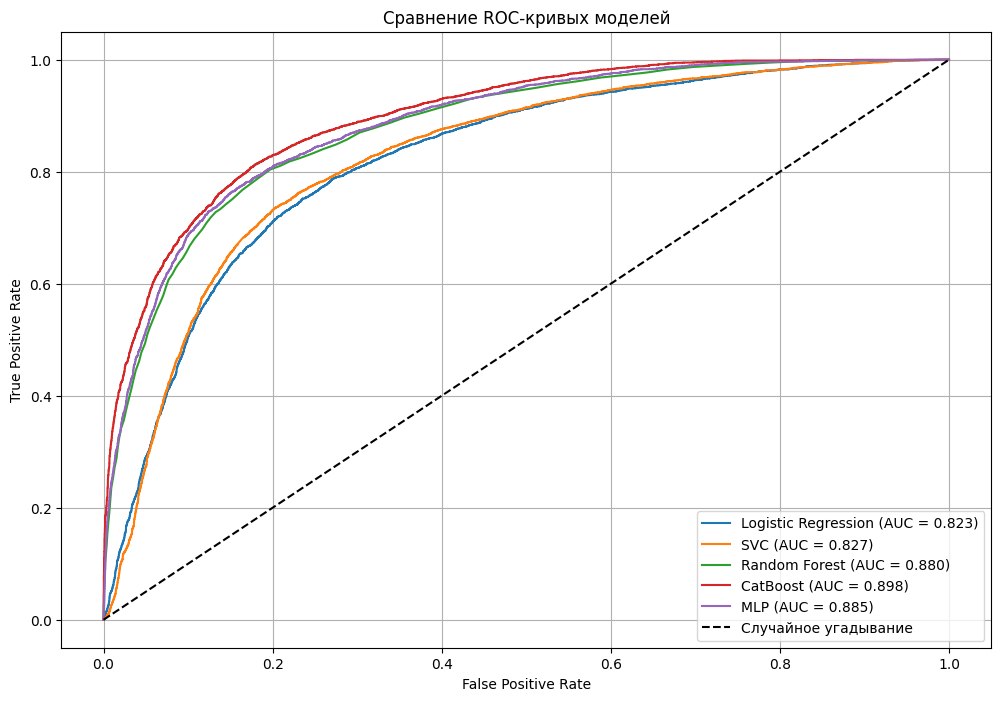

In [ ]:
plt.figure(figsize=(12, 8))
for model_name, (fpr, tpr, _) in roc_curves.items():
  try:
    auc = results[model_name]['ROC AUC']
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')
  except KeyError:
    # на случай когда доходим до измененных версий алгоритмов
    pass

plt.plot([0, 1], [0, 1], 'k--', label='Случайное угадывание')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Сравнение ROC-кривых моделей')
plt.legend()
plt.grid(True)
plt.show()